
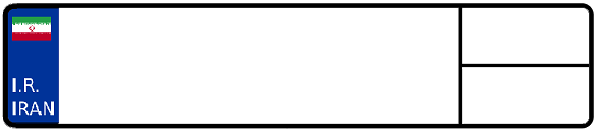

In [ ]:
import cv2
import numpy as np
import base64
from IPython.display import HTML, display

# Read the image
img = cv2.imread('/content/template-gozar.png')

# Convert the image to base64
_, buffer = cv2.imencode('.png', img)
img_base64 = base64.b64encode(buffer).decode('utf-8')

# HTML and JavaScript code
html_code = f"""
<canvas id="canvas" style="border:1px solid #000000;"></canvas>
<div id="output"></div>
<script>
    var canvas = document.getElementById('canvas');
    var ctx = canvas.getContext('2d');
    var img = new Image();
    img.onload = function() {{
        canvas.width = img.width;
        canvas.height = img.height;
        ctx.drawImage(img, 0, 0);
    }};
    img.src = 'data:image/png;base64,{img_base64}';

    var drawing = false;
    var startX, startY;

    canvas.onmousedown = function(e) {{
        drawing = true;
        startX = e.clientX - canvas.offsetLeft;
        startY = e.clientY - canvas.offsetTop;
    }};

    canvas.onmousemove = function(e) {{
        if (!drawing) return;
        var mouseX = e.clientX - canvas.offsetLeft;
        var mouseY = e.clientY - canvas.offsetTop;

        var width = mouseX - startX;
        var height = mouseY - startY;

        ctx.clearRect(0, 0, canvas.width, canvas.height);
        ctx.drawImage(img, 0, 0);
        ctx.strokeStyle = 'green';
        ctx.lineWidth = 2;
        ctx.strokeRect(startX, startY, width, height);
    }};

    canvas.onmouseup = function(e) {{
        if (!drawing) return;
        drawing = false;
        var mouseX = e.clientX - canvas.offsetLeft;
        var mouseY = e.clientY - canvas.offsetTop;

        var width = mouseX - startX;
        var height = mouseY - startY;

        ctx.clearRect(0, 0, canvas.width, canvas.height);
        ctx.drawImage(img, 0, 0);
        ctx.strokeStyle = 'green';
        ctx.lineWidth = 2;
        ctx.strokeRect(startX, startY, width, height);

        document.getElementById('output').innerHTML =
            'Rectangle from x: ' + startX + ' to x: ' + mouseX +
            ' and from y: ' + startY + ' to y: ' + mouseY;
    }};
</script>
"""

# Display the HTML
display(HTML(html_code))